In [ ]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics

In [ ]:
# Загрузка данных
df = pd.read_excel('/content/train.xlsx', sheet_name='Данные')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1.05,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 138,1.5,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Пеиод,NaN,NaN,1,NaN,1.1,1.1,NaN,NaN,NaN,...,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,KPI \nданные понедельно АлфаРМ,NaN,KPI\nданные помесячно АлфаРМ,KPI\n данные помесячно АлфаРМ (по SKU),NaN,NaN,NaN,...,NaN,Медиа (Конкурент 13),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,год,неделя,Начало нед,"Продажи, рубли","Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки",...,Итого,"ТВ, trp\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, рубли","Диджитал, руб","ТВ спонсорство, рубли","OOH, рубли","Радио, рубли",Итого,NaN


In [ ]:
# удаляем верхние строки
df = df.drop(df.index[:4])
# для переименования меток столбцов
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
# удаление последнего столбца
df = df.iloc[:, :-1]
# для сброса индекса
df.reset_index(drop=True, inplace=True)
df.head()

,год,неделя,Начало нед,"Продажи, рубли","Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки",...,"ТВ Рег, рубли",Итого,"ТВ, trp\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, рубли","Диджитал, руб","ТВ спонсорство, рубли","OOH, рубли","Радио, рубли",Итого
0,2019,1,2018-12-31 00:00:00,41535567.339,114621.15,0,0,0,0,0,...,7155663.632419,11834254.128629,207.903106,15.3615,9085528.010323,0,0,0,0,9085528.010323
1,NaN,2,2019-01-07 00:00:00,51222286.227,141523.2,0,0,0,0,0,...,8348274.237823,13996532.160484,317.467542,25.5255,10599782.67871,0,0,0,0,10599782.67871
2,NaN,3,2019-01-14 00:00:00,57127348.908,157926.3,0,0,0,0,0,...,8348274.237823,11466294.660484,192.816682,13.9125,10599782.67871,0,0,0,0,10599782.67871
3,NaN,4,2019-01-21 00:00:00,63040990.9395,173746.65,0,0,0,0,0,...,8348274.237823,10764632.160484,138.371621,8.0535,10599782.67871,0,0,0,0,10599782.67871
4,NaN,5,2019-01-28 00:00:00,67336888.8675,185551.8,0,0,0,0,0,...,8477038.252863,10984967.913169,286.984113,24.2235,12893092.405548,0,0,0,0,12893092.405548


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Columns: 147 entries, год to Итого
dtypes: object(147)
memory usage: 360.7+ KB


In [ ]:
print('Количество уникальных значений:\n')
df.nunique()

Количество уникальных значений:



год                        6
неделя                    53
Начало нед               314
Продажи, рубли           244
Продажи, упаковки        244
                        ... 
Диджитал, руб             64
ТВ спонсорство, рубли      1
OOH, рубли                 4
Радио, рубли              14
Итого                    101
Length: 147, dtype: int64

In [ ]:
print('Пропущенные значения:\n')
df.isnull().sum()

Пропущенные значения:



год                      308
неделя                     0
Начало нед                 0
Продажи, рубли            70
Продажи, упаковки         70
                        ... 
Диджитал, руб             70
ТВ спонсорство, рубли     70
OOH, рубли                70
Радио, рубли              70
Итого                    196
Length: 147, dtype: int64

# **arima**

In [ ]:
sales = df.iloc[:, 2:4]
sales.tail()

,Начало нед,"Продажи, рубли"
309,2024-12-02 00:00:00,NaN
310,2024-12-09 00:00:00,NaN
311,2024-12-16 00:00:00,NaN
312,2024-12-23 00:00:00,NaN
313,2024-12-30 00:00:00,NaN


In [ ]:
boxes = df.iloc[:, [2, 4]]
boxes.head()

,Начало нед,"Продажи, упаковки"
0,2018-12-31 00:00:00,114621.15
1,2019-01-07 00:00:00,141523.2
2,2019-01-14 00:00:00,157926.3
3,2019-01-21 00:00:00,173746.65
4,2019-01-28 00:00:00,185551.8


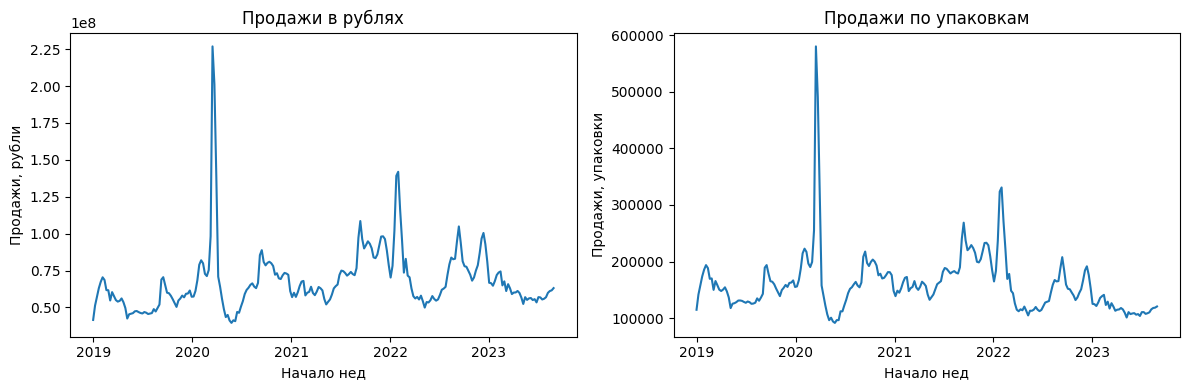

In [ ]:
# Создание полотна для графиков
plt.figure(figsize=(12, 4))

# Первый график
plt.subplot(1, 2, 1)
sns.lineplot(data=sales, x="Начало нед", y="Продажи, рубли")
plt.title("Продажи в рублях")

# Второй график
plt.subplot(1, 2, 2)
sns.lineplot(data=boxes, x="Начало нед", y="Продажи, упаковки")
plt.title("Продажи по упаковкам")

# Отображение графиков
plt.tight_layout()
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.arima import ADFTest

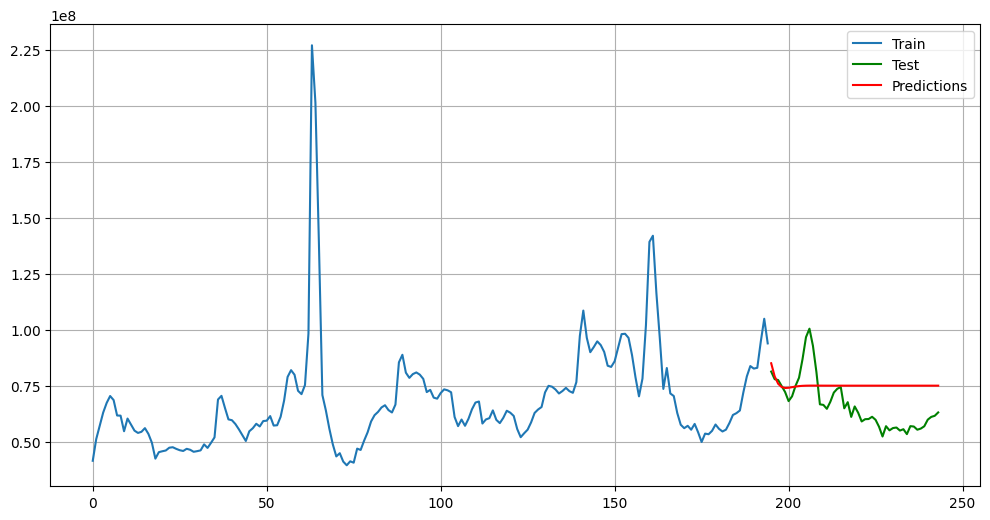

In [ ]:
sales = sales.dropna(subset=["Продажи, рубли"])
data = sales["Продажи, рубли"]

# Разделение данных на обучающий и тестовый набор
train, test = train_test_split(data, train_size=0.8)

# Инициализация автоматической модели ARIMA
model = auto_arima(train, seasonal=True, m=12)

# Прогнозирование на тестовом наборе
predictions = model.predict(n_periods=len(test))

# Построение графика с результатами
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.grid()
plt.show()

# **RandomForest**

In [ ]:
reg = df.drop(df.columns[[0,1,2,3,5,6,7,8,9,10,11]], axis=1)
reg = reg.iloc[:-70]
reg = reg.iloc[:, 0:7]
reg = reg.fillna(0)
reg = reg.astype(float)
reg.tail()

,"Продажи, упаковки",Дистрибуция Мирамистин,Выписки,Статистика заболеваемости,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),Развитие Дженериков \n(кол-во брендов)
239,110088.30,0.9975,64408.58422,367920.0,1.542399,0.063335,15.75
240,115345.65,0.9975,64408.58422,390915.0,1.566483,0.070484,15.75
241,117761.70,0.9975,64408.58422,398580.0,1.566483,0.070484,15.75
242,118356.00,0.9975,64408.58422,429240.0,1.566483,0.070484,15.75
243,120437.10,0.9975,64408.58422,459900.0,1.566483,0.070484,15.75


In [ ]:
X = reg.drop('Продажи, упаковки', axis=1)
y = reg['Продажи, упаковки']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X.shape)
print(y.shape)
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

(244, 6)
(244,)
1020
444
170
74


**Метрики**

1. **RSQ**, или R-квадрат, также известный как коэффициент детерминации, является статистической метрикой, используемой для оценки того, насколько хорошо модель регрессии соответствует фактическим данным.

Значение R-квадрат находится в диапазоне от 0 до 1 и интерпретируется следующим образом:

0: Модель не объясняет вариацию зависимой переменной.
1: Модель идеально объясняет вариацию зависимой переменной.
Чем ближе значение R-квадрат к 1, тем лучше модель объясняет вариацию зависимой переменной. Однако следует помнить, что R-квадрат не дает информации о точности прогнозов модели или о том, насколько хорошо модель подходит для прогнозирования новых данных. Поэтому важно анализировать R-квадрат в сочетании с другими метриками и в контексте конкретной проблемы.

Формула для вычисления R-квадрат:

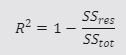

где ( SS_{res} ) - сумма квадратов остатков, ( SS_{tot} ) - общая сумма квадратов.

R-квадрат также можно интерпретировать как доля дисперсии зависимой переменной, объясненная моделью.

2. **MAPE** - Средняя абсолютная процентная ошибка (Mean Absolute Percentage Error):

MAPE измеряет процентное отклонение между фактическими и предсказанными значениями.
Формула MAPE:
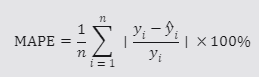

R^2: 0.87
MAPE: 5.44


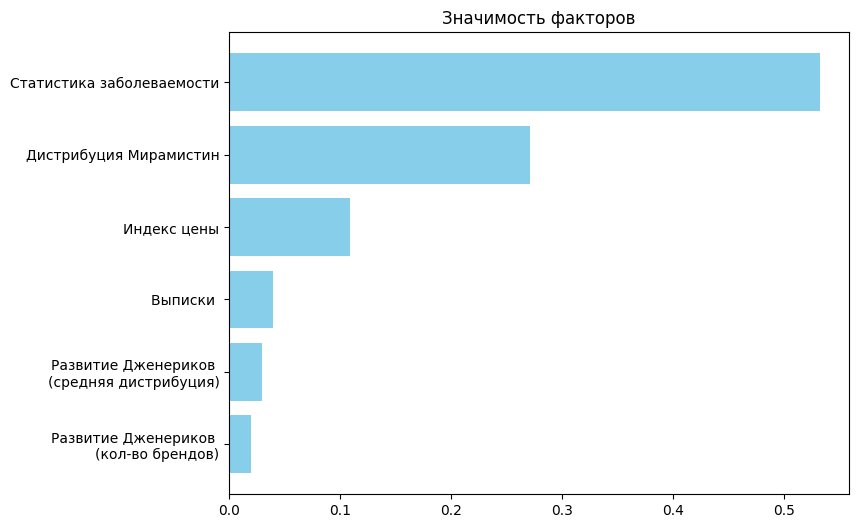

In [ ]:
# Создание и обучение модели
RF_1= RandomForestRegressor(n_estimators = 9, random_state = 0)
RF_1.fit(X_train, y_train)

# Прогнозирование моделью на тестовых данных
y_pred = RF_1.predict(X_test)

# Вычисление точности модели
acc_rf = metrics.r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('R^2: {:.2f}'.format(acc_rf))
print('MAPE: {:.2f}'.format(mape))

# Визуализация значимости факторов
feature_importance = RF_1.feature_importances_

# Получение названий столбцов из DataFrame
column_names = X.columns

feature_importance_dict = {column_names[i]: feature_importance[i] for i in range(len(column_names))}
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1])
plt.figure(figsize=(8, 6))
features, importance = zip(*sorted_features)
plt.barh(features, importance, color='skyblue')
plt.title('Значимость факторов')
plt.show()

R^2: 0.75
MAPE: 8.19


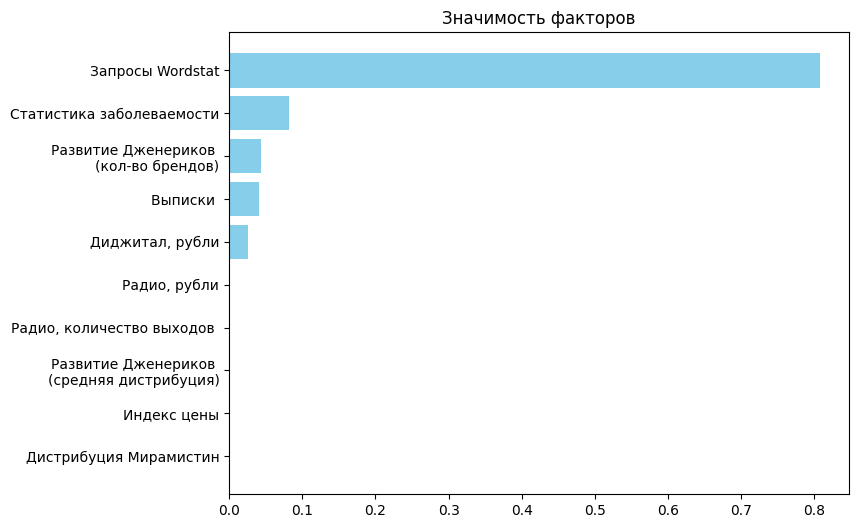

In [ ]:
# Базовая модель + медиа
new_df = df.iloc[:, [4, 12, 13, 14, 15, 16, 17, 33, 34, 35, 36]]
new_df = new_df.iloc[:-70]
new_df = new_df.fillna(0)
new_df = new_df.astype(int)

X = new_df.drop('Продажи, упаковки', axis=1)
y = new_df['Продажи, упаковки']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Создание и обучение модели
RF_2 = RandomForestRegressor(n_estimators = 40, random_state = 0)
RF_2.fit(X_train, y_train)

# Прогнозирование моделью на тестовых данных
y_pred = RF_2.predict(X_test)

# Вычисление точности модели
acc_rf = metrics.r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('R^2: {:.2f}'.format(acc_rf))
print('MAPE: {:.2f}'.format(mape))

# Визуализация значимости факторов
feature_importance = RF_2.feature_importances_
column_names = X.columns
feature_importance_dict = {column_names[i]: feature_importance[i] for i in range(len(column_names))}
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1])
plt.figure(figsize=(8, 6))
features, importance = zip(*sorted_features)
plt.barh(features, importance, color='skyblue')
plt.title('Значимость факторов')
plt.show()

# **catboost**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.7 MB/s eta 0:00:00


R^2: 0.89
MAPE: 4.86


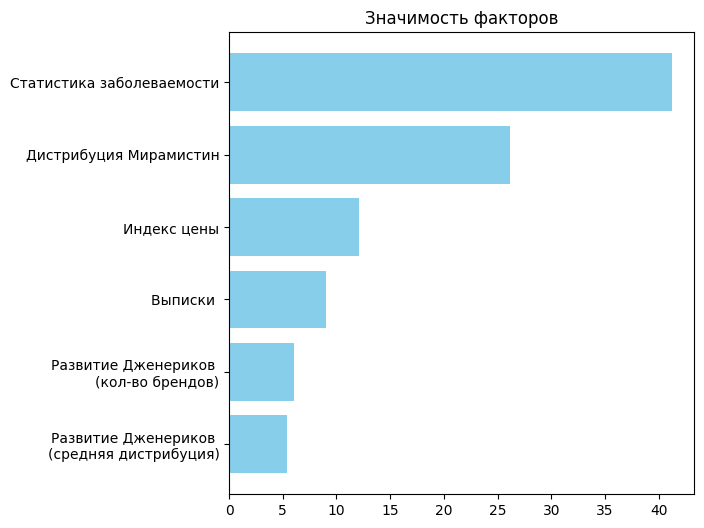

In [ ]:
from catboost import CatBoostRegressor

reg = df.drop(df.columns[[0,1,2,3,5,6,7,8,9,10,11]], axis=1)
reg = reg.iloc[:-70]
reg = reg.iloc[:, 0:7]
reg = reg.fillna(0)
reg = reg.astype(float)

X = reg.drop('Продажи, упаковки', axis=1)
y = reg['Продажи, упаковки']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Cat_1 = CatBoostRegressor(verbose=0)
Cat_1.fit(X_train, y_train)
y_pred = Cat_1.predict(X_test)

# Прогнозирование моделью на тестовых данных
y_pred = Cat_1.predict(X_test)

# Вычисление точности модели
acc_rf = metrics.r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('R^2: {:.2f}'.format(acc_rf))
print('MAPE: {:.2f}'.format(mape))

# Визуализация значимости факторов
feature_importance = Cat_1.feature_importances_
column_names = X.columns
feature_importance_dict = {column_names[i]: feature_importance[i] for i in range(len(column_names))}
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1])
plt.figure(figsize=(6, 6))
features, importance = zip(*sorted_features)
plt.barh(features, importance, color='skyblue')
plt.title('Значимость факторов')
plt.show()

In [ ]:
submission = {'y_test': y_test,
              'predict': y_pred}
solution = pd.DataFrame(submission)
solution['predict'] = Cat_1.predict(X_test).astype('float').round(1)
solution.to_csv('/content/solution.csv', index=False)
solution.head()

,y_test,predict
24,130356.45,133646.9
6,188331.15,185958.1
153,233146.20,230253.2
211,121296.00,127310.9
198,145184.55,141627.1


R^2: 0.83
MAPE: 7.37


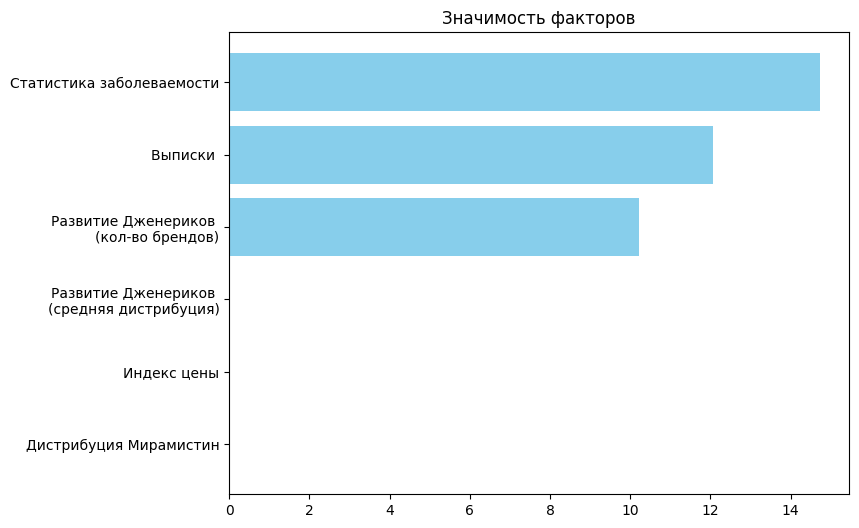

In [ ]:
# Базовая модель + медиа
new_df = df.iloc[:, [4, 12, 13, 14, 15, 16, 17, 33, 34, 35, 36]]
new_df = new_df.iloc[:-70]
new_df = new_df.fillna(0)
new_df = new_df.astype(int)

X = new_df.drop('Продажи, упаковки', axis=1)
y = new_df['Продажи, упаковки']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Cat_2 = CatBoostRegressor(verbose=0)
Cat_2.fit(X_train, y_train)
y_pred = Cat_2.predict(X_test)

# Прогнозирование моделью на тестовых данных
y_pred = Cat_2.predict(X_test)

# Вычисление точности модели
acc_rf = metrics.r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('R^2: {:.2f}'.format(acc_rf))
print('MAPE: {:.2f}'.format(mape))

# Визуализация значимости факторов
feature_importance = Cat_2.feature_importances_
column_names = X.columns
feature_importance_dict = {column_names[i]: feature_importance[i] for i in range(len(column_names))}
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1])
plt.figure(figsize=(8, 6))
features, importance = zip(*sorted_features)
plt.barh(features, importance, color='skyblue')
plt.title('Значимость факторов')
plt.show()

# **xgboost**

In [ ]:
from xgboost import XGBRegressor

# create an xgboost regression model
reg = df.drop(df.columns[[0,1,2,3,5,6,7,8,9,10,11]], axis=1)
reg = reg.iloc[:-70]
reg = reg.iloc[:, 0:7]
reg = reg.fillna(0)
reg = reg.astype(float)

X = reg.drop('Продажи, упаковки', axis=1)
y = reg['Продажи, упаковки']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8
XGB = XGBRegressor(n_estimators=40)
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

# Прогнозирование моделью на тестовых данных
y_pred = XGB.predict(X_test)

# Вычисление точности модели
acc_rf = metrics.r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('R^2: {:.2f}'.format(acc_rf))
print('MAPE: {:.2f}'.format(mape))


R^2: 0.89
MAPE: 5.42


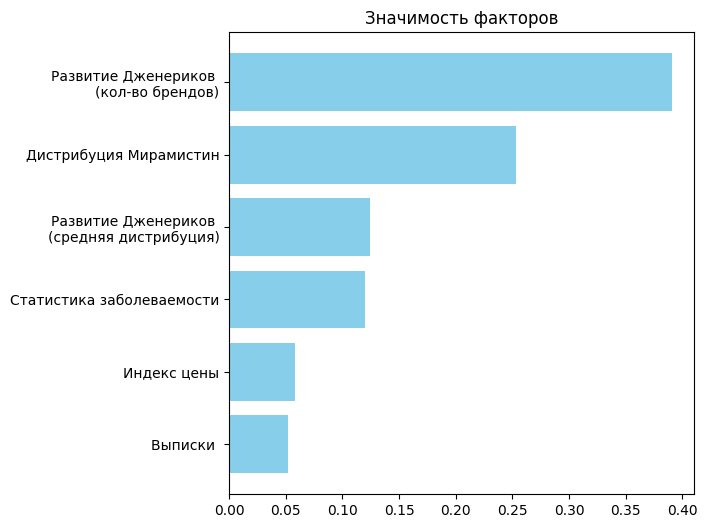

In [ ]:
# Визуализация значимости факторов
feature_importance = XGB.feature_importances_
column_names = X.columns
feature_importance_dict = {column_names[i]: feature_importance[i] for i in range(len(column_names))}
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1])
plt.figure(figsize=(6, 6))
features, importance = zip(*sorted_features)
plt.barh(features, importance, color='skyblue')
plt.title('Значимость факторов')
plt.show()